# Projeto 15: Compactação de imagens com autoencoders

## Etapa 1: Importação das bibliotecas

In [ ]:
from torchvision import datasets, transforms
from torch import nn, optim
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

## Etapa 2: Base dados

In [ ]:
dataset_train = datasets.MNIST(root='MNIST-data', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

dataset_test = datasets.MNIST(root='', train=False, download=True, transform=transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.83MB/s]


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.97MB/s]


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 472kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.79MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



## Etapa 3: Construção do modelo

In [ ]:
class autoencoder(nn.Module):

  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(in_features=784, out_features=32)
    self.dense1 = nn.Linear(in_features=32, out_features=784)

    self.activation = nn.ReLU()
    self.activation2 = nn.Sigmoid()

  def forward(self, X):

    X = X.view(-1, 784) # -1 indica que vai receber um número indeterminando de registros (vetorizando)
    X = self.dense0(X)
    X = self.activation(X)
    X = self.dense1(X)
    X = self.activation2(X)

    return X

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = autoencoder()
model.to(device)

criterion = nn.BCELoss() # faz aplicação do softmax automaticamente
optimizer = optim.Adam(model.parameters())

## Etapa 4: Treinamento do modelo

In [ ]:
for epoch in range(20):

  # Treinamento
  model.train()
  running_loss_train = 0.0
  for data in loader_train:

    inputs, _ = data
    inputs = inputs.to(device)

    optimizer.zero_grad()
    outputs = model.forward(inputs)

    loss = criterion(outputs, inputs.view(*outputs.shape))
    loss.backward()
    optimizer.step()

    running_loss_train += loss.item()

  # Validação
  model.eval()
  running_loss_test = 0.0
  for data in loader_test:

    inputs, _ = data
    inputs = inputs.to(device)

    outputs = model.forward(inputs)

    loss = criterion(outputs, inputs.view(*outputs.shape))

    running_loss_test += loss.item()

  print('Época {} - Loss Treino: {:.5f} - Loss Teste: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test)))


Época 1 - Loss Treino: 0.30737 - Loss Teste: 0.21541
Época 2 - Loss Treino: 0.19031 - Loss Teste: 0.16893
Época 3 - Loss Treino: 0.15797 - Loss Teste: 0.14679
Época 4 - Loss Treino: 0.14277 - Loss Teste: 0.13601
Época 5 - Loss Treino: 0.13409 - Loss Teste: 0.12949
Época 6 - Loss Treino: 0.12682 - Loss Teste: 0.12189
Época 7 - Loss Treino: 0.12141 - Loss Teste: 0.11804
Época 8 - Loss Treino: 0.11825 - Loss Teste: 0.11535
Época 9 - Loss Treino: 0.11613 - Loss Teste: 0.11337
Época 10 - Loss Treino: 0.11467 - Loss Teste: 0.11251
Época 11 - Loss Treino: 0.11372 - Loss Teste: 0.11188
Época 12 - Loss Treino: 0.11308 - Loss Teste: 0.11110
Época 13 - Loss Treino: 0.11261 - Loss Teste: 0.11131
Época 14 - Loss Treino: 0.11228 - Loss Teste: 0.11063
Época 15 - Loss Treino: 0.11202 - Loss Teste: 0.11034
Época 16 - Loss Treino: 0.11183 - Loss Teste: 0.11022
Época 17 - Loss Treino: 0.11168 - Loss Teste: 0.11026
Época 18 - Loss Treino: 0.11154 - Loss Teste: 0.11000
Época 19 - Loss Treino: 0.11140 - Los

## Etapa 5: Geração do encoder

In [ ]:
list(model.children())

[Linear(in_features=784, out_features=32, bias=True),
 Linear(in_features=32, out_features=784, bias=True),
 ReLU(),
 Sigmoid()]

In [ ]:
class encoder(nn.Module):

  def __init__(self):
    super().__init__()

    self.dense0 = list(model.children())[0]
    self.activation = list(model.children())[2]

  def forward(self, X):

    X = X.view(-1, 784) # -1 indica que vai receber um número indeterminando de registros (vetorizando)
    X = self.dense0(X)
    X = self.activation(X)

    return X

In [ ]:
model2 = encoder()
model2.to(device)

encoder(
  (dense0): Linear(in_features=784, out_features=32, bias=True)
  (activation): ReLU()
)

## Etapa 6: Geração do decoder

In [ ]:
class decoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = list(model.children())[1]
    self.activation = list(model.children())[3]

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation(X)

    return X

In [ ]:
model3 = decoder()
model3.to(device)

decoder(
  (dense0): Linear(in_features=32, out_features=784, bias=True)
  (activation): Sigmoid()
)

## Etapa 7: Visualização dos resultados

In [ ]:
numero_imagens = 10
imagens_teste = next(iter(loader_test))[0][:numero_imagens]
imagens_teste = imagens_teste.to(device)

In [ ]:
model2.eval()
imagens_codificadas = model2(imagens_teste)

In [ ]:
model3.eval()
imagens_decodificadas = model3(imagens_codificadas)

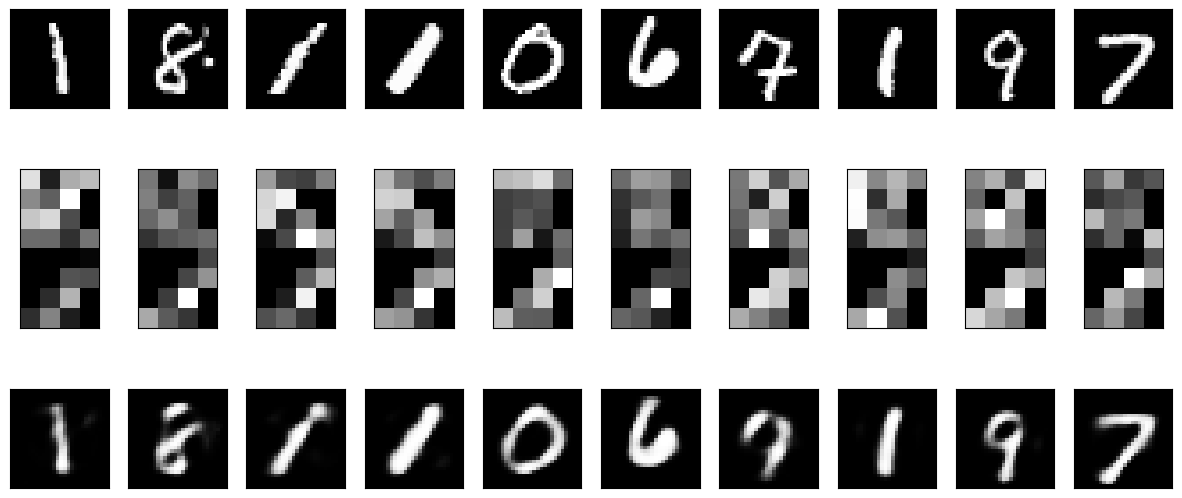

In [ ]:
img_original = imagens_teste.cpu().detach().numpy().reshape(-1, 28,28)
img_codificada = imagens_codificadas.cpu().detach().numpy().reshape(-1,8,4)
img_decodificada = imagens_decodificadas.cpu().detach().numpy().reshape(-1,28,28)

fig, axes = plt.subplots(nrows=3, ncols=numero_imagens, figsize=(15,7))
for imagens, ax_row in zip([img_original, img_codificada, img_decodificada], axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

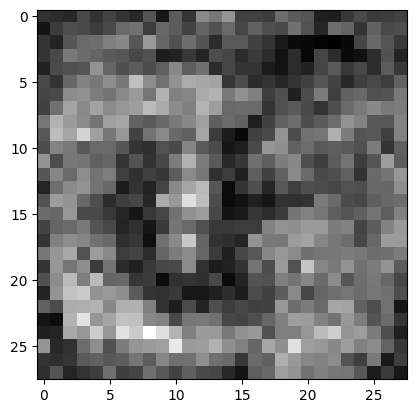

In [ ]:
# Observando se uma amostra aleatória pode gerar um número

import numpy as np

experimento = np.random.rand(1,32)
experimento = torch.tensor(experimento, dtype=torch.float).to(device)

model3.eval()
experimento_decodificado = model3(experimento)
experimento_decodificado = experimento_decodificado.cpu().detach().numpy().reshape(-1,28,28)
plt.imshow(experimento_decodificado[0], cmap='gray')
plt.show()

# Projeto 16: Autoencoders e classificação

## Etapa 1: Importação das bibliotecas

In [ ]:
from torchvision import datasets, transforms
from torch import nn, optim
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

torch.manual_seed(42)

## Etapa 2: Base de dados

In [ ]:
dataset_train = datasets.MNIST(root='MNIST-data', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

dataset_test = datasets.MNIST(root='', train=False, download=True, transform=transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 474kB/s]


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.38MB/s]


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.32MB/s]


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.8MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.22MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



## Etapa 3: Construção do autoencoder



In [ ]:
class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = nn.Linear(in_features=784, out_features=32)
    self.activation = nn.ReLU()
    self.dense1 = nn.Linear(in_features=32, out_features=784)
    self.activation2 = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation(X)
    X = self.dense1(X)
    X = self.activation2(X)

    return X

In [ ]:
model = autoencoder()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda', index=0)

## Etapa 4: Treinamento do modelo

In [ ]:
for epoch in range(20):

  # treinamento
  running_loss_train = 0.
  model.train()
  for data in loader_train:

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()

    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss_train += loss.item()

  # validação
  model.eval()
  running_loss_test = 0.
  for data in loader_test:

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)

    running_loss_test += loss.item()

  print('Época {} - Loss Treino: {:.5f} - Loss Validação: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test)))

Época 1 - Loss Treino: 5.79069 - Loss Validação: 5.68754
Época 2 - Loss Treino: 5.68692 - Loss Validação: 5.68654
Época 3 - Loss Treino: 5.68642 - Loss Validação: 5.68632
Época 4 - Loss Treino: 5.68627 - Loss Validação: 5.68624
Época 5 - Loss Treino: 5.68621 - Loss Validação: 5.68618
Época 6 - Loss Treino: 5.68617 - Loss Validação: 5.68616
Época 7 - Loss Treino: 5.68615 - Loss Validação: 5.68614
Época 8 - Loss Treino: 5.68613 - Loss Validação: 5.68613
Época 9 - Loss Treino: 5.68612 - Loss Validação: 5.68612
Época 10 - Loss Treino: 5.68612 - Loss Validação: 5.68612
Época 11 - Loss Treino: 5.68611 - Loss Validação: 5.68611
Época 12 - Loss Treino: 5.68611 - Loss Validação: 5.68611
Época 13 - Loss Treino: 5.68610 - Loss Validação: 5.68610
Época 14 - Loss Treino: 5.68610 - Loss Validação: 5.68610
Época 15 - Loss Treino: 5.68610 - Loss Validação: 5.68610
Época 16 - Loss Treino: 5.68610 - Loss Validação: 5.68610
Época 17 - Loss Treino: 5.68610 - Loss Validação: 5.68610
Época 18 - Loss Treino:

## Etapa 5: Geração do encoder

In [ ]:
list(model.children())

[Linear(in_features=784, out_features=32, bias=True),
 ReLU(),
 Linear(in_features=32, out_features=784, bias=True),
 Sigmoid()]

In [ ]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = list(model.children())[0]
    self.activation0 = list(model.children())[1]

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)

    return X

In [ ]:
model = encoder()
model.to(device)

encoder(
  (dense0): Linear(in_features=784, out_features=32, bias=True)
  (activation0): ReLU()
)

## Etapa 6: Codificação dos previsores

In [ ]:
previsores_treinamento = dataset_train.data.float() / 255.
previsores_treinamento = previsores_treinamento.view(-1, 784)
previsores_treinamento = previsores_treinamento.to(device)

In [ ]:
previsores_treinamento.shape

torch.Size([60000, 784])

In [ ]:
with torch.no_grad():
  previsores_treinamento_codificados = model(previsores_treinamento)
classe_treinamento = dataset_train.targets

In [ ]:
previsores_treinamento_codificados.shape, classe_treinamento.shape

(torch.Size([60000, 32]), torch.Size([60000]))

In [ ]:
dataset_train_cod = torch.utils.data.TensorDataset(previsores_treinamento_codificados, classe_treinamento)
loader_train_cod = torch.utils.data.DataLoader(dataset_train_cod, batch_size=256, shuffle=True)

Fazendo para a base de testes:

In [ ]:
previsores_teste = dataset_test.data.float() / 255.
previsores_teste = previsores_teste.view(-1, 784)
previsores_teste = previsores_teste.to(device)

In [ ]:
previsores_teste.shape

torch.Size([10000, 784])

In [ ]:
with torch.no_grad():
  previsores_teste_codificados = model(previsores_teste)
classe_teste = dataset_test.targets

In [ ]:
previsores_teste_codificados.shape, classe_teste.shape

(torch.Size([10000, 32]), torch.Size([10000]))

In [ ]:
dataset_test_cod = torch.utils.data.TensorDataset(previsores_teste_codificados, classe_teste)
loader_test_cod = torch.utils.data.DataLoader(dataset_test_cod, batch_size=256, shuffle=True)

## Etapa 7: Classificação sem redução de dimensionalidade

In [ ]:
c1 = nn.Sequential(nn.Linear(784, 397),
                   nn.ReLU(),
                   nn.Linear(397, 10),
                   nn.LogSoftmax(dim=1))
c1.to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(c1.parameters())

In [ ]:
for epoch in range(20):
  # Treinamento
  c1.train()
  running_loss_train = 0.
  running_accuracy_train = 0.
  for data in loader_train:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()
    outputs = c1.forward(inputs)
    ps = torch.exp(outputs)
    _, top_class = ps.topk(1, dim=1)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss_train += loss.item()
    running_accuracy_train += accuracy_score(labels.detach().cpu().numpy(), top_class.detach().cpu().numpy())

  # Validação
  c1.eval()
  running_loss_test = 0
  running_accuracy_test = 0
  for data in loader_test:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    outputs = c1.forward(inputs)
    ps = torch.exp(outputs)
    _, top_class = ps.topk(1, dim=1)

    loss = criterion(outputs, labels)

    running_loss_test += loss.item()
    running_accuracy_test += accuracy_score(labels.detach().cpu().numpy(), top_class.detach().cpu().numpy())

  print('Época {} - Loss Treino: {:.5f} - Loss Validação: {:.5f} - Acurácia Treino: {:.5f} - Acurácia Validação: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test), running_accuracy_train/len(loader_train), running_accuracy_test/len(loader_test)))


Época 1 - Loss Treino: 0.42312 - Loss Validação: 0.21873 - Acurácia Treino: 0.88856 - Acurácia Validação: 0.93564
Época 2 - Loss Treino: 0.18351 - Loss Validação: 0.14617 - Acurácia Treino: 0.94724 - Acurácia Validação: 0.95811
Época 3 - Loss Treino: 0.12641 - Loss Validação: 0.11162 - Acurácia Treino: 0.96388 - Acurácia Validação: 0.96699
Época 4 - Loss Treino: 0.09398 - Loss Validação: 0.09697 - Acurácia Treino: 0.97321 - Acurácia Validação: 0.97129
Época 5 - Loss Treino: 0.07417 - Loss Validação: 0.08354 - Acurácia Treino: 0.97848 - Acurácia Validação: 0.97480
Época 6 - Loss Treino: 0.05930 - Loss Validação: 0.07752 - Acurácia Treino: 0.98297 - Acurácia Validação: 0.97705
Época 7 - Loss Treino: 0.04820 - Loss Validação: 0.07718 - Acurácia Treino: 0.98669 - Acurácia Validação: 0.97598
Época 8 - Loss Treino: 0.03985 - Loss Validação: 0.07014 - Acurácia Treino: 0.98905 - Acurácia Validação: 0.97715
Época 9 - Loss Treino: 0.03261 - Loss Validação: 0.06429 - Acurácia Treino: 0.99136 - Ac

## Etapa 8: Classificação com redução de dimensionalidade

In [ ]:
c2 = nn.Sequential(nn.Linear(32, 21),
                   nn.ReLU(),
                   nn.Linear(21, 10),
                   nn.LogSoftmax(dim=1))
c2.to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(c2.parameters())

In [ ]:
for epoch in range(50):
  # Treinamento
  c2.train()
  running_loss_train = 0.
  running_accuracy_train = 0.
  for data in loader_train_cod:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = c2.forward(inputs)
    ps = torch.exp(outputs)
    _, top_class = ps.topk(1, dim=1)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss_train += loss.item()
    running_accuracy_train += accuracy_score(labels.detach().cpu().numpy(), top_class.detach().cpu().numpy())

  # Validação
  c2.eval()
  running_loss_test = 0
  running_accuracy_test = 0
  for data in loader_test_cod:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = c2.forward(inputs)
    ps = torch.exp(outputs)
    _, top_class = ps.topk(1, dim=1)

    loss = criterion(outputs, labels)

    running_loss_test += loss.item()
    running_accuracy_test += accuracy_score(labels.detach().cpu().numpy(), top_class.detach().cpu().numpy())

  print('Época {} - Loss Treino: {:.5f} - Loss Validação: {:.5f} - Acurácia Treino: {:.5f} - Acurácia Validação: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test), running_accuracy_train/len(loader_train), running_accuracy_test/len(loader_test)))


Época 1 - Loss Treino: 0.89053 - Loss Validação: 0.85045 - Acurácia Treino: 0.70131 - Acurácia Validação: 0.72129
Época 2 - Loss Treino: 0.88556 - Loss Validação: 0.83990 - Acurácia Treino: 0.70373 - Acurácia Validação: 0.72676
Época 3 - Loss Treino: 0.87646 - Loss Validação: 0.83678 - Acurácia Treino: 0.70697 - Acurácia Validação: 0.73018
Época 4 - Loss Treino: 0.87046 - Loss Validação: 0.82526 - Acurácia Treino: 0.70877 - Acurácia Validação: 0.73066
Época 5 - Loss Treino: 0.86417 - Loss Validação: 0.81508 - Acurácia Treino: 0.71110 - Acurácia Validação: 0.73242
Época 6 - Loss Treino: 0.85872 - Loss Validação: 0.82672 - Acurácia Treino: 0.71304 - Acurácia Validação: 0.72715
Época 7 - Loss Treino: 0.85101 - Loss Validação: 0.81380 - Acurácia Treino: 0.71622 - Acurácia Validação: 0.72822
Época 8 - Loss Treino: 0.84685 - Loss Validação: 0.80220 - Acurácia Treino: 0.71619 - Acurácia Validação: 0.73301
Época 9 - Loss Treino: 0.84269 - Loss Validação: 0.79477 - Acurácia Treino: 0.71820 - Ac

# Projeto 17: Deep autoencoders

## Etapa 1: Importação das bibliotecas

In [1]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

## Etapa 2: Base de dados

In [2]:
dataset_train = datasets.MNIST(root='MNIST-data', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

dataset_test = datasets.MNIST(root='', train=False, download=True, transform=transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.5MB/s]


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.52MB/s]


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.63MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



## Etapa 3: Construção do autoencoder

In [3]:
class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()

    # Camadas do encoder
    self.encoder0  = nn.Linear(in_features=784, out_features=128)
    self.encoder1 = nn.Linear(in_features=128, out_features=64)
    self.encoder2 = nn.Linear(in_features=64, out_features=32)

    # Camadas do decoder
    self.decoder0 = nn.Linear(in_features=32, out_features=64)
    self.decoder1 = nn.Linear(in_features=64, out_features=128)
    self.decoder2 = nn.Linear(in_features=128, out_features=784)

    # Camadas de ativação
    self.activation0 = nn.ReLU()
    self.activation1 = nn.Sigmoid()

  def forward(self, X):

    # Estrutura do decoder
    X = self.activation0(self.encoder0(X))
    X = self.activation0(self.encoder1(X))
    X = self.activation0(self.encoder2(X))

    # Estrutura do decoder
    X = self.activation0(self.decoder0(X))
    X = self.activation0(self.decoder1(X))
    X = self.activation1(self.decoder2(X))

    return X

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = autoencoder()
model.to(device)
device

device(type='cuda', index=0)

In [5]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

## Etapa 4: Treinamento do modelo

In [6]:
for epoch in range(50):

  # Treinamento
  running_loss_train = 0.
  model.train()

  for data in loader_train:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()

    outputs = model.forward(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()
    running_loss_train += loss.item()

  # Validação
  running_loss_test = 0.
  model.eval()

  for data in loader_test:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.view(-1, 784)

    outputs = model.forward(inputs)
    loss = criterion(outputs, inputs)
    running_loss_test += loss.item()

  print('Época {} - Loss Treino: {:.5f} - Loss Validação: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test)))

Época 1 - Loss Treino: 0.29166 - Loss Validação: 0.23374
Época 2 - Loss Treino: 0.20803 - Loss Validação: 0.17930
Época 3 - Loss Treino: 0.16589 - Loss Validação: 0.15358
Época 4 - Loss Treino: 0.14850 - Loss Validação: 0.14198
Época 5 - Loss Treino: 0.14001 - Loss Validação: 0.13589
Época 6 - Loss Treino: 0.13406 - Loss Validação: 0.13029
Época 7 - Loss Treino: 0.12927 - Loss Validação: 0.12571
Época 8 - Loss Treino: 0.12561 - Loss Validação: 0.12283
Época 9 - Loss Treino: 0.12301 - Loss Validação: 0.12008
Época 10 - Loss Treino: 0.12060 - Loss Validação: 0.11809
Época 11 - Loss Treino: 0.11832 - Loss Validação: 0.11603
Época 12 - Loss Treino: 0.11578 - Loss Validação: 0.11324
Época 13 - Loss Treino: 0.11359 - Loss Validação: 0.11127
Época 14 - Loss Treino: 0.11199 - Loss Validação: 0.10963
Época 15 - Loss Treino: 0.11062 - Loss Validação: 0.10898
Época 16 - Loss Treino: 0.10943 - Loss Validação: 0.10768
Época 17 - Loss Treino: 0.10829 - Loss Validação: 0.10626
Época 18 - Loss Treino:

## Etapa 5: Geração do encoder

In [7]:
list(model.children())

[Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True),
 Linear(in_features=64, out_features=32, bias=True),
 Linear(in_features=32, out_features=64, bias=True),
 Linear(in_features=64, out_features=128, bias=True),
 Linear(in_features=128, out_features=784, bias=True),
 ReLU(),
 Sigmoid()]

In [8]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder0 = list(model.children())[0]
    self.encoder1 = list(model.children())[1]
    self.encoder2 = list(model.children())[2]
    self.activation0 = list(model.children())[6]


  def forward(self, X):
    X = self.activation0(self.encoder0(X))
    X = self.activation0(self.encoder1(X))
    X = self.activation0(self.encoder2(X))

    return X

In [9]:
model1 = encoder()
model1.to(device)

encoder(
  (encoder0): Linear(in_features=784, out_features=128, bias=True)
  (encoder1): Linear(in_features=128, out_features=64, bias=True)
  (encoder2): Linear(in_features=64, out_features=32, bias=True)
  (activation0): ReLU()
)

## Etapa 6: Geração do decoder

In [10]:
class decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.decoder0 = list(model.children())[3]
    self.decoder1 = list(model.children())[4]
    self.decoder2 = list(model.children())[5]
    self.activation0 = list(model.children())[6]
    self.activation1 = list(model.children())[7]


  def forward(self, X):
    X = self.activation0(self.decoder0(X))
    X = self.activation0(self.decoder1(X))
    X = self.activation1(self.decoder2(X))

    return X

In [11]:
model2 = decoder()
model2.to(device)

decoder(
  (decoder0): Linear(in_features=32, out_features=64, bias=True)
  (decoder1): Linear(in_features=64, out_features=128, bias=True)
  (decoder2): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

## Etapa 7: Visualização dos Resultados

In [16]:
numero_imagens = 10

imagens_teste = next(iter(loader_test))[0][:numero_imagens]
imagens_teste = imagens_teste.to(device)
imagens_teste = imagens_teste.view(-1, 784)

# Imagens codificadas
model1.eval()
imagens_codificadas = model1.forward(imagens_teste)

# Imagens decodificadas
model2.eval()
imagens_decodificadas = model2.forward(imagens_codificadas)

# Formatando as imagens para visualização
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28, 28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1, 8, 4)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1, 28, 28)

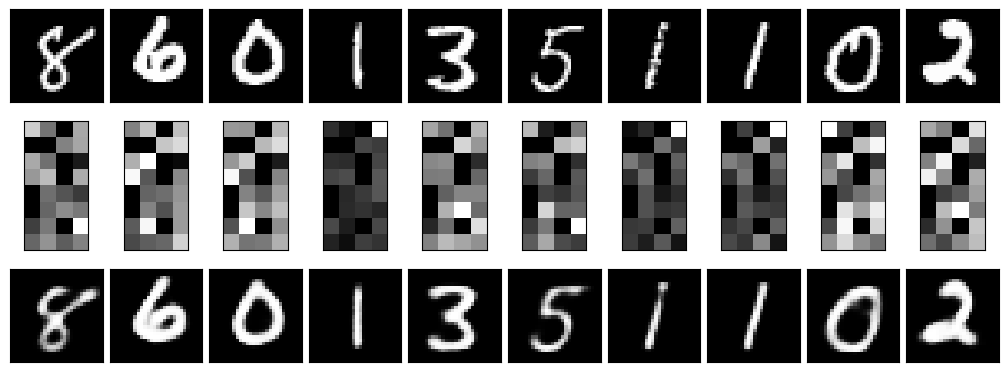

In [17]:
fig, axes = plt.subplots(3, numero_imagens, figsize=(10, 4))
for imagens, ax_row in zip([imagens_teste, imagens_codificadas, imagens_decodificadas], axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Projeto 18: Compactação de Imagens com Convolutional autoencoders

## Etapa 1: Importação de bibliotecas

In [1]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

## Etapa 2: Base de dados

In [2]:
dataset_train = datasets.MNIST(root='MNIST-data', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

dataset_test = datasets.MNIST(root='', train=False, download=True, transform=transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.06MB/s]


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 240kB/s]


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.09MB/s]


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:11<00:00, 892kB/s] 


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 63.8kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 245kB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.78MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



## Etapa 3: Construção do autoencoder

In [3]:
class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()

    # Camadas do encoder
    self.enc0 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
    self.enc1 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3)
    self.enc2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3)

    self.maxpool0 = nn.MaxPool2d(kernel_size=2)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, padding=(1,1))

    self.flatten = nn.Flatten()

    # Camadas do decoder
    self.dec0 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=(3,3), padding=(1,1))
    self.dec1 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=(3,3), padding=(1,1))
    self.dec2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3))
    self.dec3 = nn.Conv2d(in_channels=16, out_channels=1, kernel_size=(3,3), padding=(1,1))

    self.upsampling = nn.UpsamplingNearest2d(scale_factor=2)

    # Camadas de ativação
    self.activation0 = nn.ReLU()
    self.activation1 = nn.Sigmoid()

  def forward(self, X):

      # Estrutura do encoder
      X = self.maxpool0(self.activation0(self.enc0(X)))
      X = self.maxpool1(self.activation0(self.enc1(X)))
      X = self.flatten(self.activation0(self.enc2(X)))

      X = X.view(-1, 8, 4, 4)

      # Estrutura do decoder
      X = self.upsampling(self.activation0(self.dec0(X)))
      X = self.upsampling(self.activation0(self.dec1(X)))
      X = self.upsampling(self.activation0(self.dec2(X)))
      X = self.activation1(self.dec3(X))

      return X

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = autoencoder()
model.to(device)
device

device(type='cuda', index=0)

In [5]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

## Etapa 4: Treinamento do modelo

In [6]:
for epoch in range(20):

  # Treinamento
  model.train()
  running_loss_train = 0.

  for data in loader_train:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = model.forward(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()

    optimizer.step()

    running_loss_train += loss.item()

  # Validação
  model.eval()
  running_loss_test = 0.

  for data in loader_test:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model.forward(inputs)
    loss = criterion(outputs, inputs)
    running_loss_test += loss.item()

  print('Época {} - Loss Treino: {:.5f} - Loss Validação: {:.5f}'.format(epoch+1, running_loss_train/len(loader_train), running_loss_test/len(loader_test)))

Época 1 - Loss Treino: 0.32507 - Loss Validação: 0.22352
Época 2 - Loss Treino: 0.19087 - Loss Validação: 0.16731
Época 3 - Loss Treino: 0.15408 - Loss Validação: 0.14399
Época 4 - Loss Treino: 0.14041 - Loss Validação: 0.13564
Época 5 - Loss Treino: 0.13407 - Loss Validação: 0.12999
Época 6 - Loss Treino: 0.12971 - Loss Validação: 0.12617
Época 7 - Loss Treino: 0.12658 - Loss Validação: 0.12371
Época 8 - Loss Treino: 0.12405 - Loss Validação: 0.12161
Época 9 - Loss Treino: 0.12199 - Loss Validação: 0.11959
Época 10 - Loss Treino: 0.12015 - Loss Validação: 0.11802
Época 11 - Loss Treino: 0.11870 - Loss Validação: 0.11685
Época 12 - Loss Treino: 0.11739 - Loss Validação: 0.11550
Época 13 - Loss Treino: 0.11593 - Loss Validação: 0.11414
Época 14 - Loss Treino: 0.11483 - Loss Validação: 0.11415
Época 15 - Loss Treino: 0.11383 - Loss Validação: 0.11244
Época 16 - Loss Treino: 0.11303 - Loss Validação: 0.11134
Época 17 - Loss Treino: 0.11199 - Loss Validação: 0.11000
Época 18 - Loss Treino:

## Etapa 5: Geração do encoder

In [7]:
for i, layer in enumerate(list(model.children())):
  print(i, layer)

0 Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
1 Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
2 Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
3 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
4 MaxPool2d(kernel_size=2, stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
5 Flatten(start_dim=1, end_dim=-1)
6 Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
7 Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8 Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
9 Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
10 UpsamplingNearest2d(scale_factor=2.0, mode='nearest')
11 ReLU()
12 Sigmoid()


In [8]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder0 = list(model.children())[0]
    self.encoder1 = list(model.children())[1]
    self.encoder2 = list(model.children())[2]

    self.maxpool0 = list(model.children())[3]
    self.maxpool1 = list(model.children())[4]

    self.flatten = list(model.children())[5]

    self.activation0 = list(model.children())[11]

  def forward(self, X):
    X = self.maxpool0(self.activation0(self.encoder0(X)))
    X = self.maxpool1(self.activation0(self.encoder1(X)))
    X = self.flatten(self.activation0(self.encoder2(X)))

    return X

In [9]:
model1 = encoder()
model1.to(device)

encoder(
  (encoder0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (encoder1): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (encoder2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
  (maxpool0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (activation0): ReLU()
)

## Etapa 6: Geração do decoder

In [10]:
class decoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.decoder0 = list(model.children())[6]
    self.decoder1 = list(model.children())[7]
    self.decoder2 = list(model.children())[8]
    self.decoder3 = list(model.children())[9]

    self.upsampling = list(model.children())[10]

    self.activation0 = list(model.children())[11]
    self.activation1 = list(model.children())[12]


  def forward(self, X):
    X = X.view(-1, 8, 4, 4)
    X = self.upsampling(self.activation0(self.decoder0(X)))
    X = self.upsampling(self.activation0(self.decoder1(X)))
    X = self.upsampling(self.activation0(self.decoder2(X)))
    X = self.activation1(self.decoder3(X))

    return X

In [11]:
model2 = decoder()
model2.to(device)

decoder(
  (decoder0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (decoder1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (decoder2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (decoder3): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsampling): UpsamplingNearest2d(scale_factor=2.0, mode='nearest')
  (activation0): ReLU()
  (activation1): Sigmoid()
)

## Etapa 7: Visualização dos Resultados

In [15]:
numero_imagens = 10

imagens_teste = next(iter(loader_test))[0][:numero_imagens]
imagens_teste = imagens_teste.to(device)

# Imagens codificadas
model1.eval()
imagens_codificadas = model1.forward(imagens_teste)

# Imagens decodificadas
model2.eval()
imagens_decodificadas = model2.forward(imagens_codificadas)

# Formatando as imagens para visualização
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28, 28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1, 16, 8)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1, 28, 28)

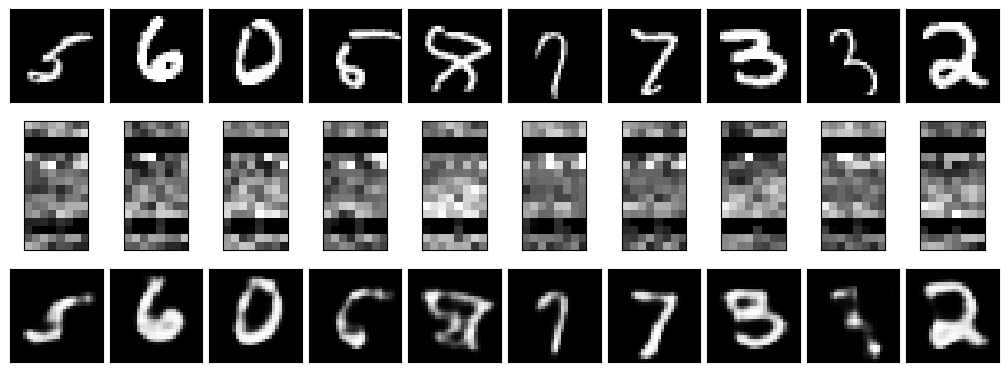

In [16]:
fig, axes = plt.subplots(3, numero_imagens, figsize=(10, 4))
for imagens, ax_row in zip([imagens_teste, imagens_codificadas, imagens_decodificadas], axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)